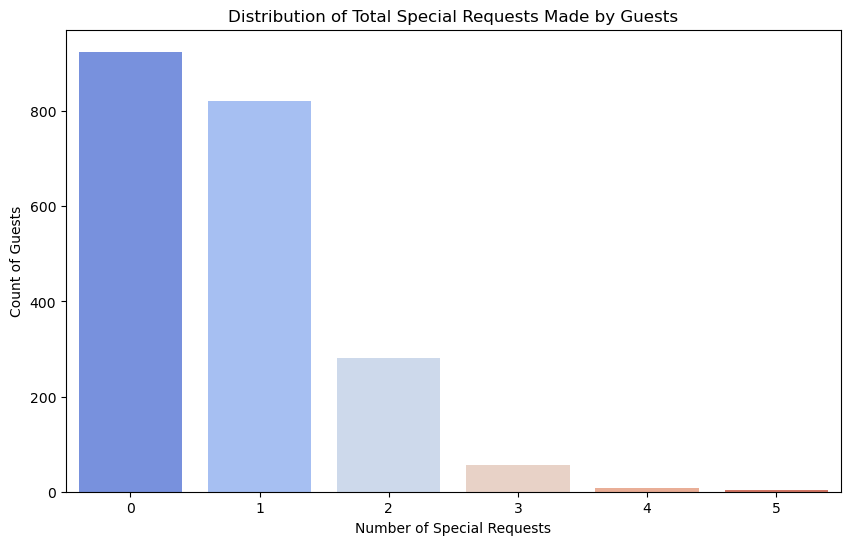

Descriptive Statistics for Total Special Requests:
count    2097.000000
mean        0.764902
std         0.828608
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: total_of_special_requests, dtype: float64


In [3]:
#Task 1.1: Customer Satisfication
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("DS1_C5_S5_Hotel Dataset.csv")
df

# Distribution of the total number of special requests
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', data=df, palette='coolwarm')
plt.title('Distribution of Total Special Requests Made by Guests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count of Guests')
plt.show()

# Descriptive statistics for total special requests
request_stats = df['total_of_special_requests'].describe()
print("Descriptive Statistics for Total Special Requests:")
print(request_stats)

In [7]:
# Assuming the dataset has specific columns for each type of special request
# Examples: 'request_bed_type', 'request_high_floor', 'request_baby_cot', 'request_meal_preference'

# Count the total requests for each type (these are dummy column names, replace with actual names)
if 'request_bed_type' in df.columns:
    request_columns = ['request_bed_type', 'request_high_floor', 'request_baby_cot', 'request_meal_preference']
    
    # Sum of each request type
    request_type_distribution = df[request_columns].sum()

    # Plot distribution of request types
    plt.figure(figsize=(10, 6))
    request_type_distribution.sort_values(ascending=False).plot(kind='bar', color='teal')
    plt.title('Distribution of Types of Special Requests')
    plt.xlabel('Type of Request')
    plt.ylabel('Number of Requests')
    plt.xticks(rotation=45)
    plt.show()

    print("Count of Each Type of Request:")
    print(request_type_distribution)

In [13]:
# Correlation between total requests and specific request types
if 'request_bed_type' in df.columns:
    request_columns = ['total_of_special_requests', 'request_bed_type', 'request_high_floor', 'request_baby_cot', 'request_meal_preference']
    
    # Correlation matrix
    correlation_matrix = df[request_columns].corr()
    print("Correlation Matrix for Total and Specific Request Types:")
    print(correlation_matrix)
    
    # Heatmap for correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Total Requests and Specific Types of Requests')
    plt.show()

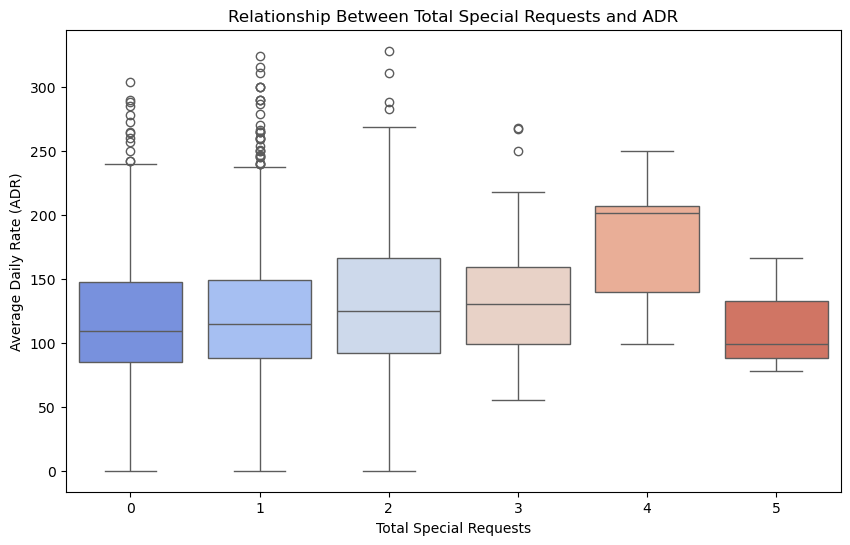

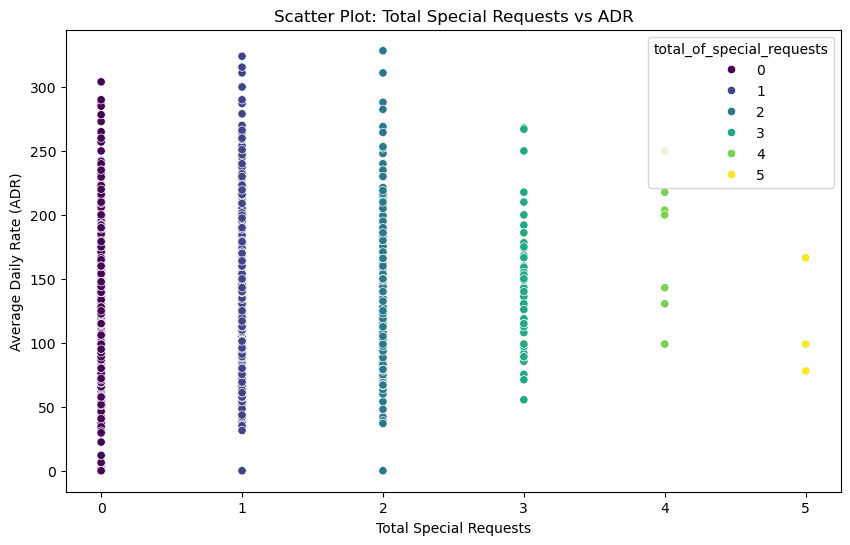

Spearman Correlation between Total Special Requests and ADR: 0.10
Pearson Correlation between Total Special Requests and ADR: 0.11


In [45]:
#Task 1.2: 
from scipy.stats import spearmanr, pearsonr
# 1. Visualize the relationship between total special requests and ADR
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_of_special_requests', y='adr', data=df, palette='coolwarm')
plt.title('Relationship Between Total Special Requests and ADR')
plt.xlabel('Total Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# 2. Scatter plot for more clarity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_of_special_requests', y='adr', data=df, hue='total_of_special_requests', palette='viridis')
plt.title('Scatter Plot: Total Special Requests vs ADR')
plt.xlabel('Total Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# 3. Correlation analysis between total_of_special_requests and ADR
spearman_corr, _ = spearmanr(df['total_of_special_requests'], df['adr'])
pearson_corr, _ = pearsonr(df['total_of_special_requests'], df['adr'])

print(f"Spearman Correlation between Total Special Requests and ADR: {spearman_corr:.2f}")
print(f"Pearson Correlation between Total Special Requests and ADR: {pearson_corr:.2f}")

Percentage of Guests Who Received Their Preferred Room: 88.75%


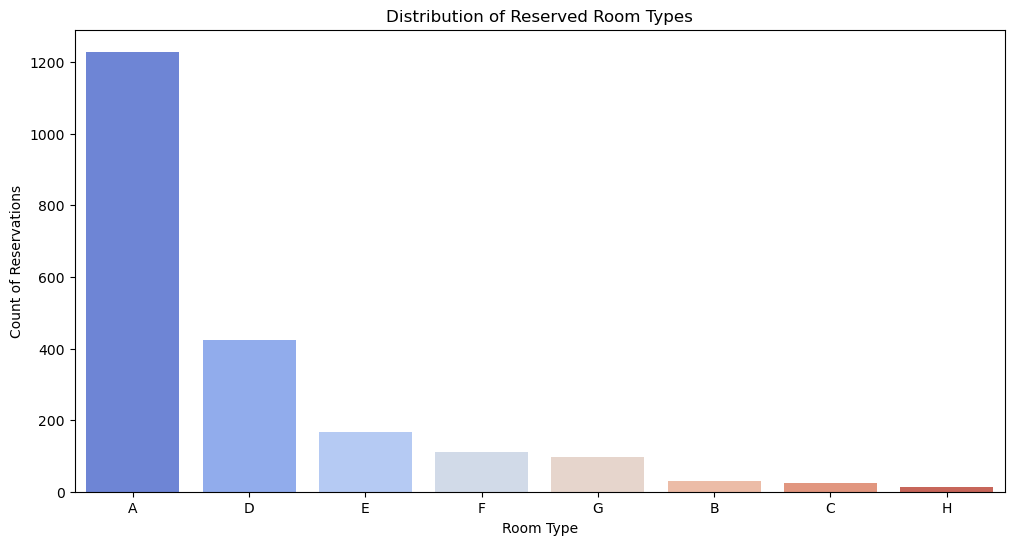

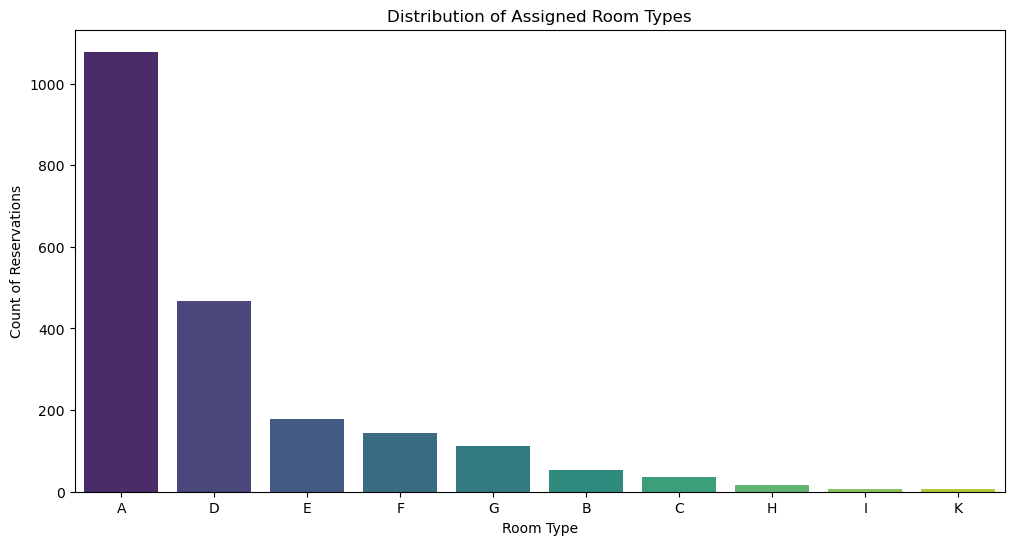

Average ADR for Each Room Type:
reserved_room_type
H    225.505714
G    198.491735
F    177.835714
C    172.684348
E    154.054940
D    134.109882
B    104.705000
A    102.282482
Name: adr, dtype: float64


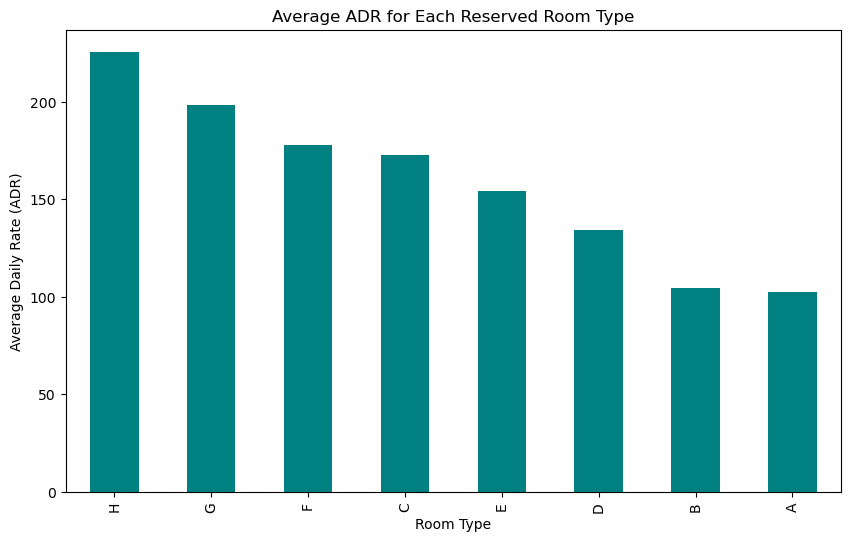

Percentage of Guests Who Did Not Receive Their Reserved Room Type: 11.25%


In [33]:
# 1. Analyze reserved and assigned room types
room_preference_df = df.groupby(['reserved_room_type', 'assigned_room_type']).size().reset_index(name='count')

# 2. Calculate how often the reserved room type matches the assigned room type
room_match_rate = (df['reserved_room_type'] == df['assigned_room_type']).mean() * 100
print(f"Percentage of Guests Who Received Their Preferred Room: {room_match_rate:.2f}%")

# 3. Plot distribution of reserved vs assigned room types
plt.figure(figsize=(12, 6))
sns.countplot(x='reserved_room_type', data=df, order=df['reserved_room_type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Reserved Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count of Reservations')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='assigned_room_type', data=df, order=df['assigned_room_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Assigned Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count of Reservations')
plt.show()

# 4. Analyze the Average ADR for each room type
room_adr_analysis = df.groupby('reserved_room_type')['adr'].mean().sort_values(ascending=False)
print("Average ADR for Each Room Type:")
print(room_adr_analysis)

# 5. Visualize the ADR for each room type
plt.figure(figsize=(10, 6))
room_adr_analysis.plot(kind='bar', color='teal')
plt.title('Average ADR for Each Reserved Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# 6. Analyze percentage of customers whose room request was not fulfilled
room_mismatch = df[df['reserved_room_type'] != df['assigned_room_type']]
mismatch_rate = (len(room_mismatch) / len(df)) * 100
print(f"Percentage of Guests Who Did Not Receive Their Reserved Room Type: {mismatch_rate:.2f}%")

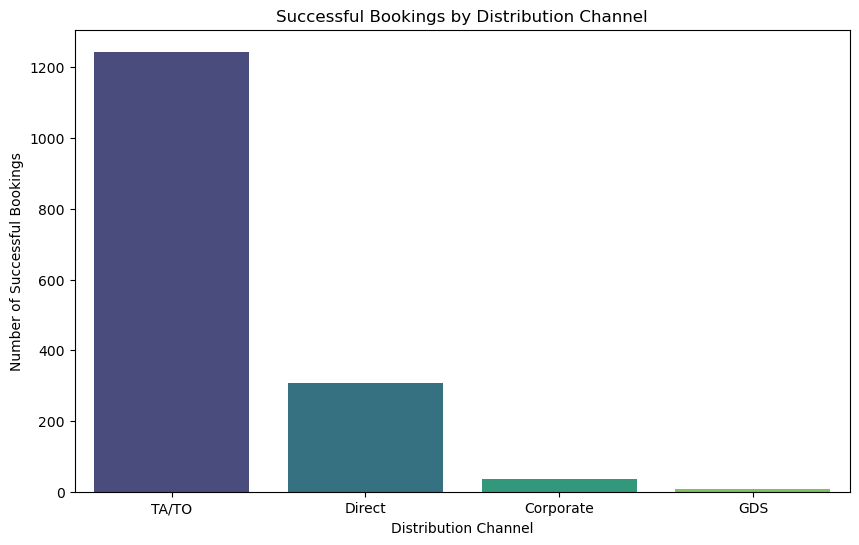


Percentage of Successful Bookings by Channel:
distribution_channel
TA/TO        77.944862
Direct       19.298246
Corporate     2.192982
GDS           0.563910
Name: proportion, dtype: float64


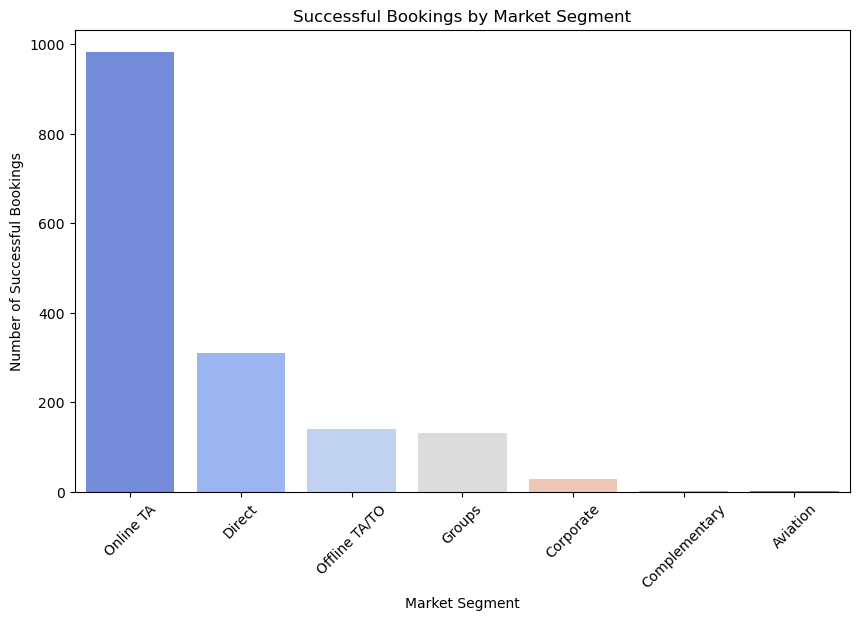


Percentage of Successful Bookings by Market Segment:
market_segment
Online TA        61.591479
Direct           19.360902
Offline TA/TO     8.834586
Groups            8.270677
Corporate         1.817043
Complementary     0.062657
Aviation          0.062657
Name: proportion, dtype: float64


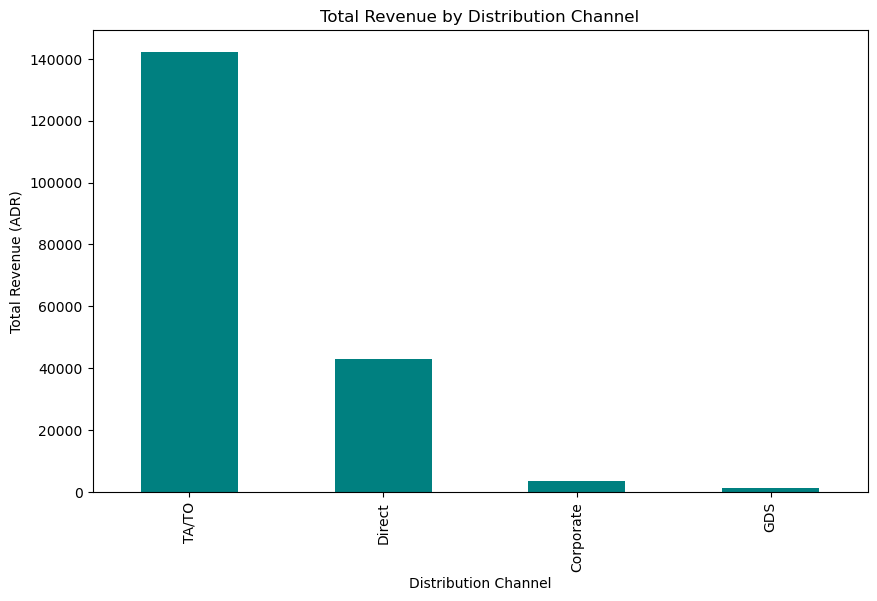

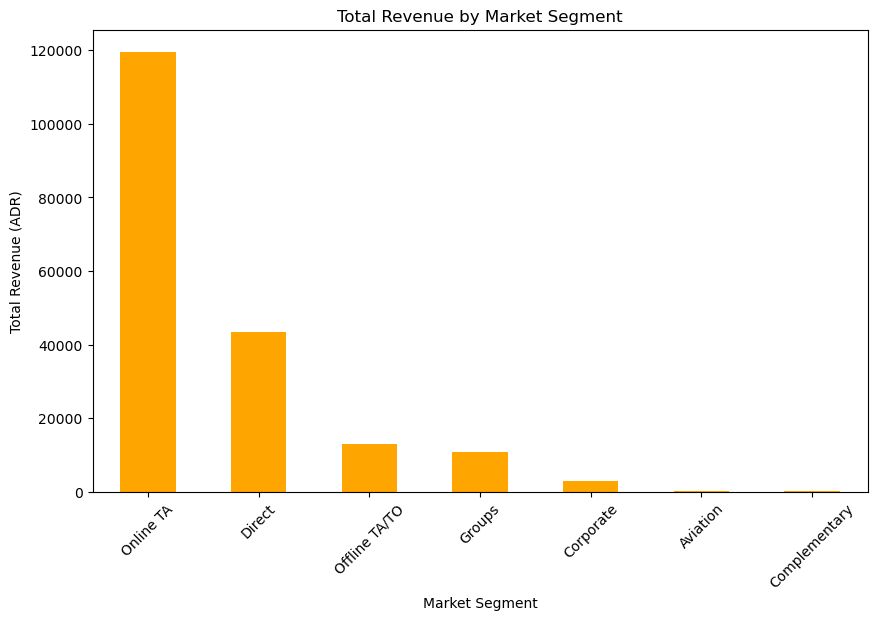


Total Revenue by Distribution Channel:
distribution_channel
TA/TO        142181.07
Direct        42878.80
Corporate      3636.96
GDS            1189.93
Name: adr, dtype: float64

Total Revenue by Market Segment:
market_segment
Online TA        119607.65
Direct            43359.55
Offline TA/TO     12879.50
Groups            10874.10
Corporate          2976.96
Aviation            110.00
Complementary        79.00
Name: adr, dtype: float64


In [35]:
#Task 2.1: Marketing and sales optimazation
# Filter only successful bookings (non-canceled bookings)
successful_bookings = df[df['is_canceled'] == 0]

# 1. *Marketing Channels Analysis*
# Count total successful bookings by distribution channel
channel_analysis = successful_bookings['distribution_channel'].value_counts(normalize=True) * 100
channel_counts = successful_bookings['distribution_channel'].value_counts()

# Plot the distribution of successful bookings by channel
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')
plt.title('Successful Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Successful Bookings')
plt.show()

# Print the distribution of successful bookings by channel
print("\nPercentage of Successful Bookings by Channel:")
print(channel_analysis)

# 2. *Market Segments Analysis*
# Count total successful bookings by market segment
segment_analysis = successful_bookings['market_segment'].value_counts(normalize=True) * 100
segment_counts = successful_bookings['market_segment'].value_counts()

# Plot the distribution of successful bookings by market segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')
plt.title('Successful Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Successful Bookings')
plt.xticks(rotation=45)
plt.show()

# Print the distribution of successful bookings by market segment
print("\nPercentage of Successful Bookings by Market Segment:")
print(segment_analysis)

# 3. *Revenue Contribution*
# Calculate total revenue contribution by channel and segment
revenue_by_channel = successful_bookings.groupby('distribution_channel')['adr'].sum().sort_values(ascending=False)
revenue_by_segment = successful_bookings.groupby('market_segment')['adr'].sum().sort_values(ascending=False)

# Plot total revenue by distribution channel
plt.figure(figsize=(10, 6))
revenue_by_channel.plot(kind='bar', color='teal')
plt.title('Total Revenue by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Revenue (ADR)')
plt.show()

# Plot total revenue by market segment
plt.figure(figsize=(10, 6))
revenue_by_segment.plot(kind='bar', color='orange')
plt.title('Total Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Revenue (ADR)')
plt.xticks(rotation=45)
plt.show()

# Print the revenue contribution
print("\nTotal Revenue by Distribution Channel:")
print(revenue_by_channel)

print("\nTotal Revenue by Market Segment:")
print(revenue_by_segment)


*Booking Distribution by Distribution Channel (Counts)*
distribution_channel
TA/TO        1689
Direct        351
Corporate      35
GDS            22
Name: count, dtype: int64

*Booking Distribution by Distribution Channel (Percentages)*
distribution_channel
TA/TO        80.543634
Direct       16.738197
Corporate     1.669051
GDS           1.049118
Name: count, dtype: float64


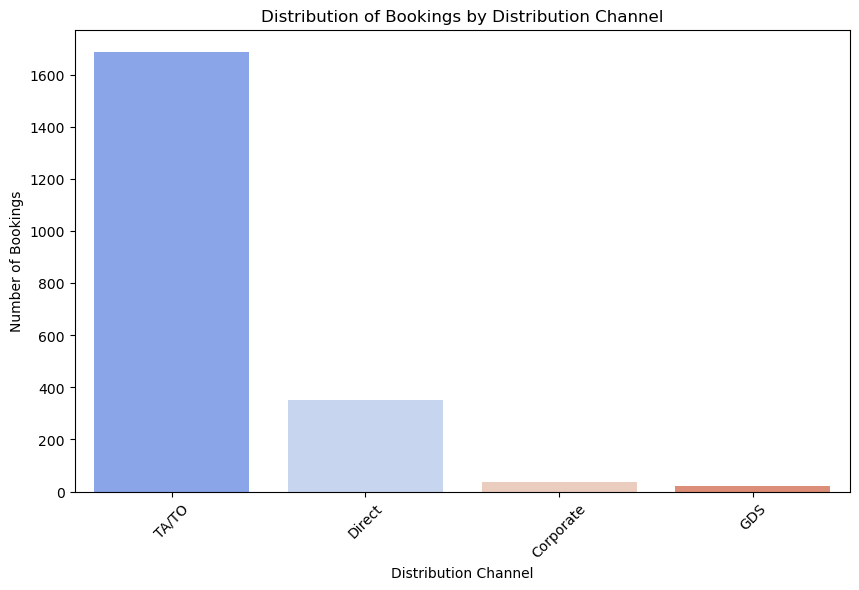

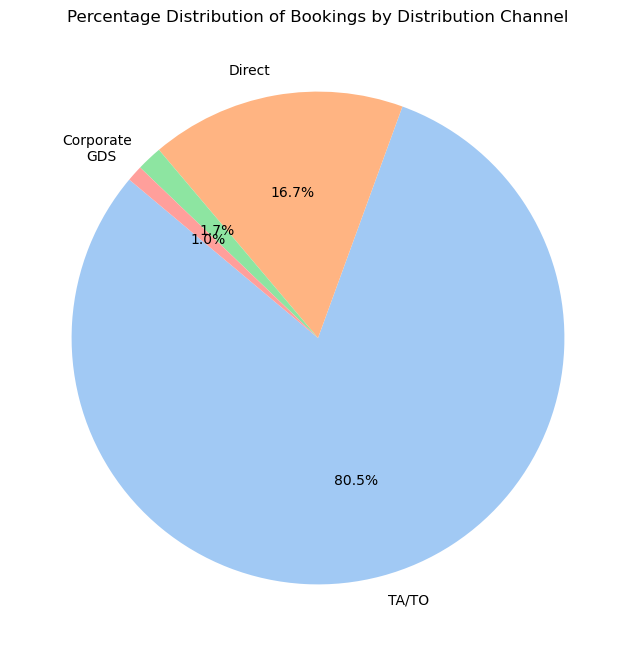

In [49]:
#Task 2.3:
# 1. Count the number of bookings for each distribution channel
channel_distribution = df['distribution_channel'].value_counts()

# 2. Calculate the percentage distribution of bookings for each channel
channel_percentage = (channel_distribution / channel_distribution.sum()) * 100

# Print the distribution counts and percentages
print("\n*Booking Distribution by Distribution Channel (Counts)*")
print(channel_distribution)

print("\n*Booking Distribution by Distribution Channel (Percentages)*")
print(channel_percentage)

# 3. Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_distribution.index, y=channel_distribution.values, palette='coolwarm')
plt.title('Distribution of Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# 4. Plot the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(channel_distribution, labels=channel_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Percentage Distribution of Bookings by Distribution Channel')
plt.show()

### Task 3: Summarization:
#### 3a Interpretation:
##### 1. most of the booking occure during holidays, months and weekend
##### 2. Longer lead times may increase cancellation rates as customer plans change over time
##### 3. Cancelation are more frequent for booking made far in advance group bookings
##### 4. ADR is higher during holiday and weekend, suggesting a surge pricing strategy should be implemented
##### 5. Frequent changes in booking can increase operational costs and workloads
##### 6. loylaty programes increase direct bookings reduce reliance on OTAs, and promote brand loyalty